In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Deep Learning
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.preprocessing import image
from keras.layers import Convolution2D, MaxPooling2D

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train = pd.read_csv('./train.csv', encoding='utf8')
test = pd.read_csv('./test.csv', encoding='utf8')
train_column_headers = list(train.columns.values)[1:]

# Analisis Exploratorio

In [3]:
exploratory = train.copy()
threshold = 15

for column in train_column_headers:
  exploratory.loc[exploratory[column] < threshold, column] = 0
  exploratory.loc[exploratory[column] >= threshold, column] = 1

In [4]:
# Cantidad de pixeles oscuros vs claros
train.head(1).transpose().value_counts()

0      687
253     24
254      6
93       3
94       3
248      2
240      2
13       2
89       2
250      2
20       2
209      2
80       2
188      2
7        2
191      2
76       1
1        1
88       1
81       1
77       1
27       1
54       1
29       1
25       1
95       1
22       1
17       1
16       1
15       1
10       1
23       1
255      1
103      1
208      1
251      1
247      1
245      1
238      1
235      1
220      1
218      1
214      1
210      1
207      1
123      1
206      1
203      1
198      1
196      1
195      1
170      1
168      1
167      1
131      1
159      1
dtype: int64

In [5]:
x_train = (exploratory.iloc[:,1:].values).astype('float32')
y_train = exploratory.iloc[:,0].values.astype('int32')

Text(0.5, 1.0, '0')

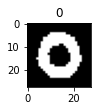

In [6]:
# Convertir dataset a (numero de imagenes, pixeles ancho, pixeles largo) 
x_train = x_train.reshape(x_train.shape[0], 28, 28)

plt.subplot(331)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.title(y_train[1])

In [7]:
# Se encuentran cuantos pixels blancos hay en cada imagen
exploratory = exploratory.astype('int32')

pixels = exploratory.sum(axis=1)
white_pixels = pd.DataFrame(data={'label': exploratory['label'], 'pixels': pixels})
white_pixels.groupby(by='label').describe()

pixels                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
0      4132.0  182.751210  34.021410  81.0  159.0  181.0  204.0  350.0
1      4684.0   82.848847  19.350918  35.0   69.0   81.0   94.0  200.0
2      4177.0  162.291836  32.598162  70.0  139.0  162.0  184.0  299.0
3      4351.0  157.356240  33.233060  58.0  134.0  156.0  180.0  281.0
4      4072.0  137.650295  27.374384  66.0  117.0  135.0  156.0  259.0
5      3795.0  148.838735  33.353158  60.0  125.0  147.0  171.0  292.0
6      4137.0  155.499637  32.091746  59.0  133.0  153.0  176.0  296.0
7      4401.0  131.479209  26.568002  69.0  112.0  129.0  149.0  251.0
8      4063.0  171.935516  32.470633  84.0  149.0  169.0  191.0  303.0
9      4188.0  144.050143  27.935318  73.0  125.0  142.0  161.0  272.0

In [8]:
white_pixels['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

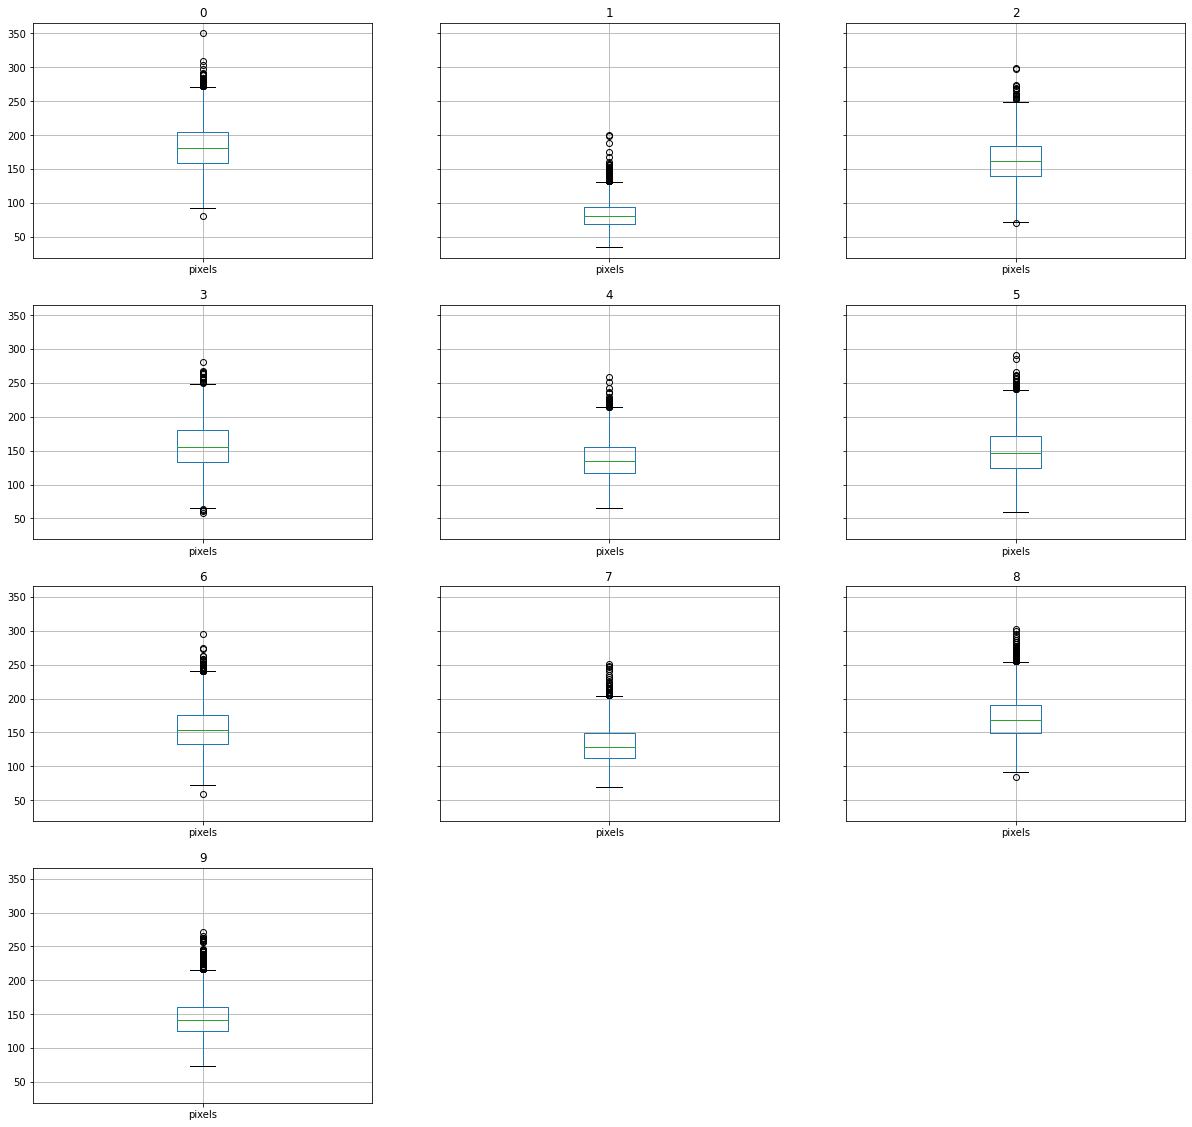

In [9]:
plt.rcParams["figure.figsize"] = (20, 20)
white_pixels.groupby(by='label').boxplot(column='pixels')
plt.rcParams["figure.figsize"] = (6, 4)

# Redes Neuronales

In [10]:
x_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
x_test = test.values.astype('float32')

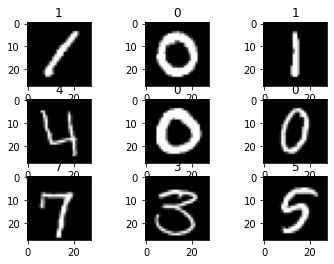

In [11]:
#Convert train datset to (num_images, img_rows, img_cols) format 
x_train = x_train.reshape(x_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_train.shape

(42000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
x_test.shape

(28000, 28, 28, 1)

In [14]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
  return (x-mean_px)/std_px

In [15]:
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [16]:
seed = 43
np.random.seed(seed)

In [17]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print('input shape', model.input_shape)
print('output shape', model.output_shape)

input shape (None, 28, 28, 1)
output shape (None, 10)


In [18]:
model.compile(
  optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)
gen = image.ImageDataGenerator()

In [19]:
x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [20]:
history=model.fit(
  x=x_train,
  y=y_train,
  epochs=6,
  batch_size=16,
  validation_split=0.1,
  verbose=2
)

Epoch 1/6
1890/1890 - 2s - loss: 0.4112 - accuracy: 0.8792 - val_loss: 0.3265 - val_accuracy: 0.9128 - 2s/epoch - 1ms/step
Epoch 2/6
1890/1890 - 4s - loss: 0.3190 - accuracy: 0.9115 - val_loss: 0.3421 - val_accuracy: 0.9104 - 4s/epoch - 2ms/step
Epoch 3/6
1890/1890 - 3s - loss: 0.3068 - accuracy: 0.9154 - val_loss: 0.3257 - val_accuracy: 0.9193 - 3s/epoch - 2ms/step
Epoch 4/6
1890/1890 - 3s - loss: 0.2979 - accuracy: 0.9195 - val_loss: 0.3220 - val_accuracy: 0.9193 - 3s/epoch - 2ms/step
Epoch 5/6
1890/1890 - 3s - loss: 0.2928 - accuracy: 0.9218 - val_loss: 0.3321 - val_accuracy: 0.9259 - 3s/epoch - 2ms/step
Epoch 6/6
1890/1890 - 3s - loss: 0.2882 - accuracy: 0.9217 - val_loss: 0.3123 - val_accuracy: 0.9271 - 3s/epoch - 2ms/step


In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

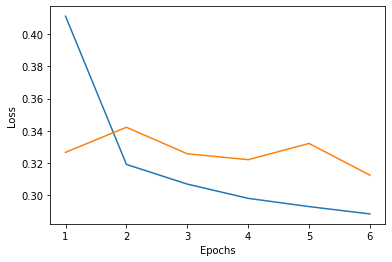

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values)
plt.plot(epochs, val_loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

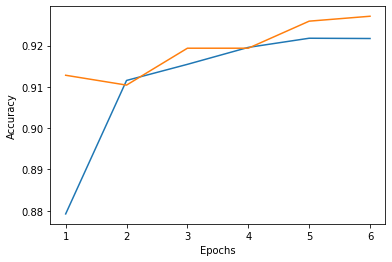

In [23]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values)
plt.plot(epochs, val_acc_values)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [24]:
y_preds = model.predict(x_val, verbose=0)

In [25]:
y_prediction = []
for prediction in y_preds:
  max_value = max(prediction)
  max_index = list(prediction).index(max_value)
  y_prediction.append(max_index)
y_prediction = np.array(y_prediction).astype('int64')

In [26]:
y_validation = []
for value in y_val:
  max_value = max(value)
  max_index = list(value).index(max_value)
  y_validation.append(max_index)
y_validation = np.array(y_validation).astype('int64')

In [27]:
result = confusion_matrix(y_validation, y_prediction)
result

array([[779,   0,   2,   1,   4,  14,   8,   2,   5,   1],
       [  0, 887,   3,   0,   1,   4,   1,   5,   8,   0],
       [  7,  13, 726,  20,  15,   7,  11,  17,  27,   3],
       [  2,   3,  15, 835,   0,  28,   3,  11,  25,  15],
       [  2,   1,   3,   2, 774,   3,  10,   7,   4,  33],
       [  3,   1,   5,  25,  14, 611,  12,   4,  22,   5],
       [  4,   1,   3,   0,   3,   9, 759,   1,   5,   0],
       [  0,   3,   7,   7,   8,   4,   1, 833,   4,  26],
       [  3,  10,   3,  36,   6,  26,   6,   4, 731,  10],
       [  3,   2,   1,  12,  10,   8,   1,  39,   8, 754]], dtype=int64)

In [28]:
accuracy = metrics.accuracy_score(y_validation, y_prediction)
accuracy

0.9153571428571429

# Deep Learning

In [74]:
x_train = (train.iloc[:,1:].values).astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
x_test = test.values.astype('float32')

x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

y_train = to_categorical(y_train)
num_classes = y_train.shape[1]

seed = 43
np.random.seed(seed)

In [75]:
modelo = Sequential()
#Agregamos la primera convolución
modelo.add(Convolution2D(32,(3,3),strides=(1,1), input_shape=(28,28,1), activation='relu'))

In [76]:
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [77]:
modelo.add(Convolution2D(64,(3,3),strides=(1,1),activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [78]:
modelo.add(Flatten())

In [79]:
modelo.add(Dense(512,activation='relu'))

In [80]:
modelo.add(Dense(10, activation='sigmoid'))

In [81]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 512)              

In [82]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [83]:
epocas = 3
lote = 32

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)


In [84]:
H = modelo.fit(
  x=x_train,
  y=y_train,
  epochs=epocas
)

Epoch 1/3
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0788 - accuracy: 0.9515
Epoch 2/3
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0112 - accuracy: 0.9863
Epoch 3/3
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0075 - accuracy: 0.9904


In [96]:
y_preds = modelo.predict(x_val)

263/263 [==============================] - 2s 6ms/step


In [97]:
len(x_test)

28000

In [98]:
len(y_preds)

8400

In [99]:
y_prediction = []
for prediction in y_preds:
  max_value = max(prediction)
  max_index = list(prediction).index(max_value)
  y_prediction.append(max_index)
y_prediction = np.array(y_prediction).astype('int64')

In [100]:
y_validation = []
for value in y_val:
  max_value = max(value)
  max_index = list(value).index(max_value)
  y_validation.append(max_index)
y_validation = np.array(y_validation).astype('int64')

In [103]:
result = confusion_matrix(y_validation, y_prediction)
result

array([[807,   0,   1,   0,   0,   3,   4,   0,   0,   1],
       [  0, 906,   2,   0,   0,   0,   0,   0,   0,   1],
       [  1,   2, 834,   3,   2,   0,   0,   3,   1,   0],
       [  1,   0,   4, 922,   0,   6,   0,   1,   2,   1],
       [  0,   0,   0,   0, 829,   0,   3,   1,   0,   6],
       [  0,   2,   1,   2,   0, 692,   3,   0,   1,   1],
       [  0,   4,   0,   0,   3,   2, 775,   0,   1,   0],
       [  0,   1,   4,   1,   4,   0,   0, 882,   0,   1],
       [  0,   5,   5,   0,   3,   4,   0,   2, 814,   2],
       [  1,   0,   3,   0,   7,   3,   0,   2,   0, 822]], dtype=int64)

In [104]:
accuracy = metrics.accuracy_score(y_validation, y_prediction)
accuracy

0.9860714285714286